# **Homework 4**
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW3_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission. 

**NOTE:** Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 03/12/2021 (Friday).

Please ensure you follow all the steps mentioned in the homework.

Most questions have sample outputs to help you understand the question.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below - 

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name')) 

Import all the libraries you require in the cell below.

Wee Jin Koh, ITP 449 Spring 2021

In [ ]:
# import all necessary libraries here

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### 1. Create a statistical summary of the data in the file “CommuteStLouis.csv”. Plot a histogram of age for the CommuteStLouis data.

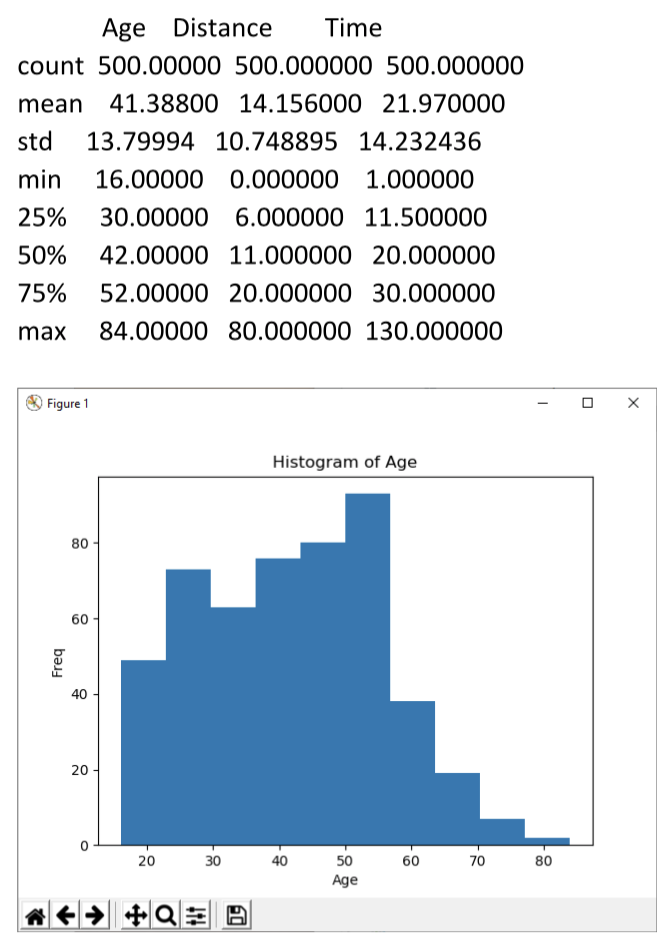

In [ ]:
# Type solution here
'''PART 1'''
#read csv file in
df = pd.read_csv('CommuteStLouis.csv')

#statistical summary using .describe()
df.describe()



,Age,Distance,Time
count,500.00000,500.000000,500.000000
mean,41.38800,14.156000,21.970000
std,13.79994,10.748895,14.232436
min,16.00000,0.000000,1.000000
25%,30.00000,6.000000,11.500000
50%,42.00000,11.000000,20.000000
75%,52.00000,20.000000,30.000000
max,84.00000,80.000000,130.000000


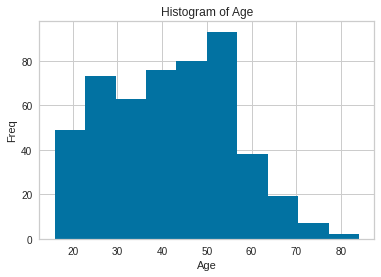

In [ ]:
#plot histagram of age, specify 10 bins
'''PART 2'''
plt.hist(df.Age, bins=10)

#add plot descriptors
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Freq")

plt.show()

### 2. For the data CommuteStLouis:

a. Produce a correlation matrix of age, distance and time. Which two numeric variables are most highly correlated? What is the correlation coefficient for the above pair? Hint: If df is your dataframe then you can use print(df.corr()).

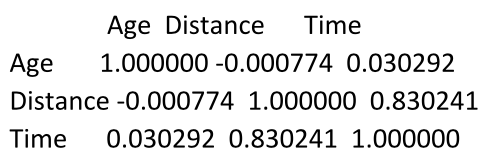

b. Create a scatterplot matrix of the numeric variables in the data. What do the figures in the diagonal going from the top left to the bottom right show? What can you say about the skewness of the various attributes?

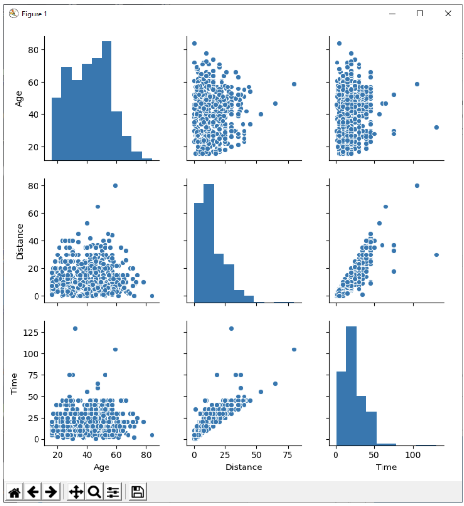

c. Produce a side-by-side boxplot of distance travelled by gender. Do the data in the file indicate that women tend to commute shorter distances?

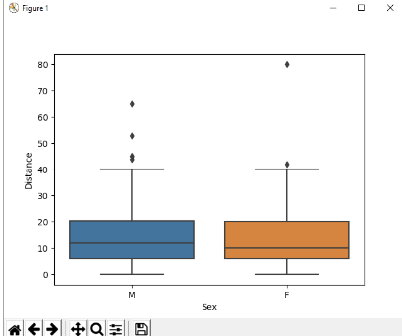

In [ ]:
# Type solution here
#2a.
print(df.corr())
#Distance and Time are the most closely correlated with a correlation coefficient of 0.830241



               Age  Distance      Time
Age       1.000000 -0.000774  0.030292
Distance -0.000774  1.000000  0.830241
Time      0.030292  0.830241  1.000000


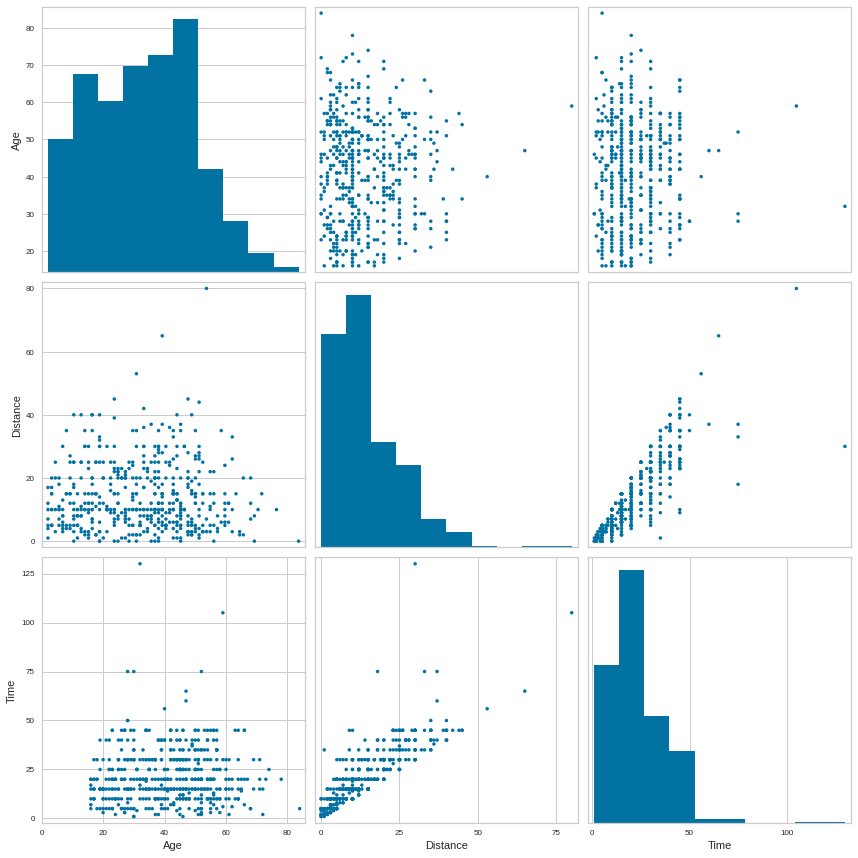

In [ ]:
#2b.
#matplotlib way of scatterplot matrix
#isolation of numeric variables
df1 = df[["Age", "Distance", "Time"]]
ax = pd.plotting.scatter_matrix(df1,figsize=(12,12), alpha=1)

#plot labeling to match screenshot
#ax[0,0].set_yticks(np.arange(0,100,20))  --- commented out this since colab displays it wrongly during some instances of runtime restart.
ax[1,0].set_yticks(np.arange(0,100,20))
ax[2,0].set_yticks(np.arange(0,150,25))

ax[2,0].set_xticks(np.arange(0,100,20))
ax[2,0].tick_params('x', labelrotation=0)
ax[2,1].set_xticks(np.arange(0,100,25))
ax[2,1].tick_params('x', labelrotation=0)
ax[2,2].set_xticks(np.arange(0,150,50))
ax[2,2].tick_params('x', labelrotation=0)

plt.tight_layout(pad=1.0)

plt.show()

#The diagonal of the scatterplot matrix from top left to bottom right shows frequency histograms of the variables Age, Distance, and Time.
#From the histograms, Distance and Time are heavily right skewed, while Age is right skewed to a lesser extent.

'Spoke with Meghana in office hours on 3/10 regarding the histogram for age in seaborn, and we could not figure out why the frequency does not match with the\nhistogram in Question 1 even though the code used is correct. The matplotlib way above provides the correct histogram for age based on the same dataframe.'

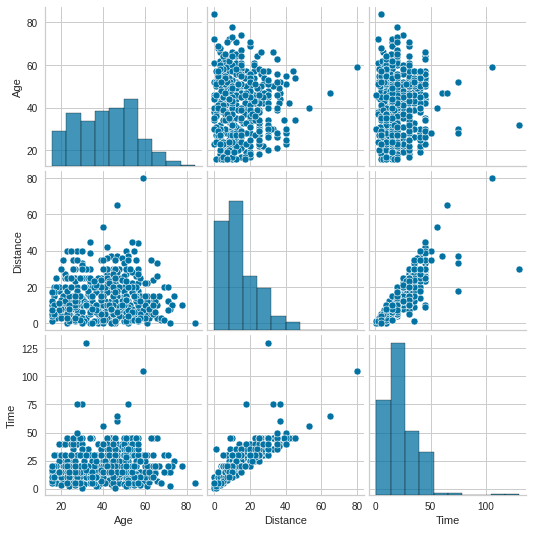

In [ ]:
#2b. 
#seaborn way of scatterplot matrix
#isolation of numeric variables
df1 = df[["Age", "Distance", "Time"]]


#created 10 bins to match with screenshot
sns.pairplot(df1, diag_kws={'bins':10})

#The diagonal of the scatterplot matrix from top left to bottom right shows frequency histograms of the variables Age, Distance, and Time.
#From the histograms, Distance and Time are heavily right skewed, while Age is right skewed to a lesser extent.

'''Spoke with Meghana in office hours on 3/10 regarding the histogram for Age in seaborn, and we could not figure out why the frequency does not match with the
histogram in Question 1 even though the code used is correct. The matplotlib way above provides the correct histogram for age based on the same dataframe.'''

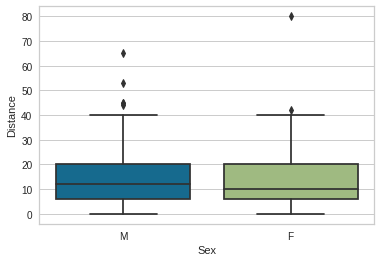

In [ ]:
#2c.
boxplot = sns.boxplot(x="Sex", y="Distance", data=df)

#According to the boxplots, the median distance for females is slightly lower than for males.
#Overall, however, there is no significant difference in commuting differences for males and females since Q1, Q3, Q1 - 1.5SQR, Q3 + 1.5SQR all appear to be the around the same.

### 3. For the pair in Question 2.a plot the scatter plot. Also superimpose a linear regression line on the plot.

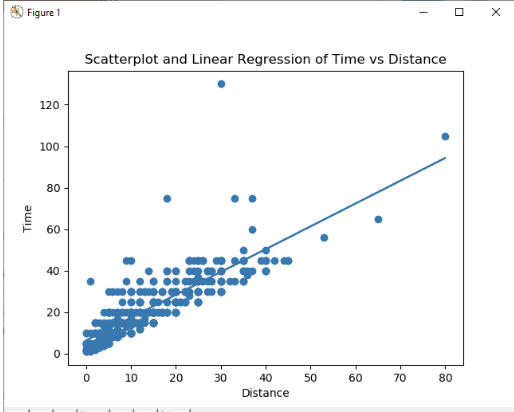

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


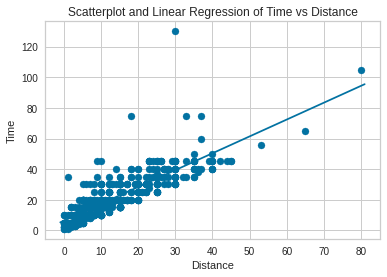

In [ ]:
# Type solution here

#import the Linear Regression class
x = df.Distance
y = df.Time

#Choose model parameters
model = LinearRegression(fit_intercept=True)

# Numpy newaxis is used to increase the dimension of numpy array
X = x[:, np.newaxis]

#fit the model to the data
model.fit(X, y)

#Predict label for unknown data
xfit = np.linspace(-1, 81, num=80)
Xfit = xfit[:, np.newaxis] 
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit, color='b')

plt.title("Scatterplot and Linear Regression of Time vs Distance")
plt.xlabel("Distance")
plt.xticks(np.arange(0,90,10))
plt.ylabel("Time")
plt.show()

### 4. Show the distribution of residuals of the data from Part 3.

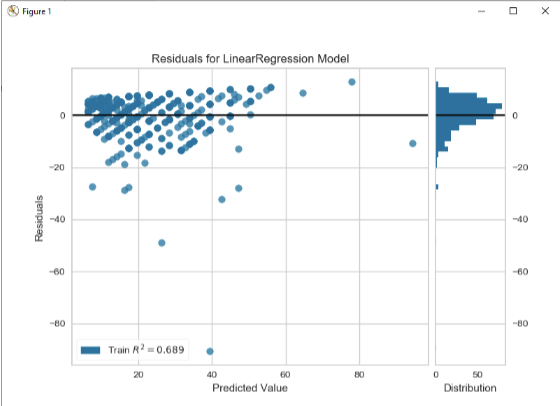

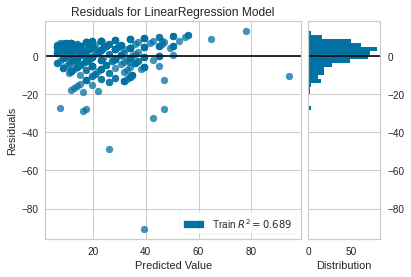

In [ ]:
# Type solution here
x_train = df['Distance'].values
X_train = x_train.reshape(-1, 1)
y_train = df['Time']

# Instantiate the linear model and the visualizer
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.poof();

